In [32]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import shutil
import os
%matplotlib inline

In [3]:
df_amount = pd.read_excel('供应商额度列表2020-06-16.xls', sheet_name='供应商额度使用报表')[['大区 ', '供应商抬头 ', '总额度（吨） ']]

In [4]:
df_trade = pd.read_csv('for供应商历史额度占用.csv')

In [5]:
df_trade['下单日期'] = pd.to_datetime(df_trade['下单日期'])
df_trade['实提日期'] = pd.to_datetime(df_trade['实提日期'])

In [6]:
len(df_trade)

1817006

In [7]:
df_trade.head(2)

,供应商名称,订单编号,下单日期,实提日期,实提吨数
0,银河德睿资本管理有限公司,XS20061513320133,2020-06-15,2020-06-15,28.340
1,北京鑫海建业金属材料有限公司,XS20061513321479,2020-06-15,2020-06-16,33.732


In [8]:
df_trade.columns

Index(['供应商名称', '订单编号', '下单日期', '实提日期', '实提吨数'], dtype='object')

In [9]:
df_amount.columns

Index(['大区 ', '供应商抬头 ', '总额度（吨） '], dtype='object')

In [10]:
df_amount.head(2)

,大区,供应商抬头,总额度（吨）
0,上海区,上海找钢网信息科技股份有限公司,100000
1,浙赣区,浙江物产金属集团有限公司,100000


In [11]:
df_amount['供应商抬头 '].values

array(['上海找钢网信息科技股份有限公司', '浙江物产金属集团有限公司', '浙江物产国际贸易有限公司', ...,
       '重庆侨和物资有限公司', '重庆钢丰商贸有限责任公司', '测试专用'], dtype=object)

In [12]:
int((days_for_loop[-1] - days_for_loop[0]).days / 30)

NameError: name 'days_for_loop' is not defined

In [48]:
int(pd.Series(amount_need_dict).max())

10880

In [49]:
int(pd.Series(amount_need_dict).mean())

1789

In [62]:
amount_max_dict

{'浙江物产金属集团有限公司': 10880,
 '浙江物产国际贸易有限公司': 7023,
 '杭州热联集团股份有限公司': 11914,
 '厦门国贸集团股份有限公司': 14936,
 '浙江杭钢国贸有限公司': 8713,
 '浙江省冶金物资有限公司': 7691,
 '北京中铁建工物资有限公司': 23355,
 '浙江特产金属材料有限公司': 1192,
 '浙江中拓供应链管理有限公司': 4838}

In [12]:
df_amount.head(2)

,大区,供应商抬头,总额度（吨）
0,上海区,上海找钢网信息科技股份有限公司,100000
1,浙赣区,浙江物产金属集团有限公司,100000


In [13]:
df_amount['供应商抬头 '].map(amount_max_dict).head(2)

NameError: name 'amount_max_dict' is not defined

In [24]:
df_amount['历史合作月份'] = df_amount['供应商抬头 '].map(amount_corp_period_dict)
df_amount['历史额度占用最大值'] = df_amount['供应商抬头 '].map(amount_max_dict)
df_amount['历史额度占用平均值'] = df_amount['供应商抬头 '].map(amount_mean_dict)

In [25]:
df_amount.head(5)

,大区,供应商抬头,总额度（吨）,历史合作月份,历史额度占用最大值,历史额度占用平均值
0,上海区,上海找钢网信息科技股份有限公司,100000,NaN,NaN,NaN
1,浙赣区,浙江物产金属集团有限公司,100000,79.900000,10880.0,1789.0
2,浙赣区,浙江物产国际贸易有限公司,100000,70.666667,7023.0,296.0
3,浙赣区,杭州热联集团股份有限公司,50000,68.866667,11914.0,1667.0
4,浙赣区,厦门国贸集团股份有限公司,30000,60.400000,14936.0,232.0


In [26]:
df_amount.to_csv('历史额度情况总表.csv', encoding='GBK')

In [ ]:

#第一部分，准备工作，拼接出要存放的文件夹的路径
file = 'E:/测试/1.jpg'
#current_foder是‘模拟’文件夹下所有子文件名组成的一个列表
current_folder = os.listdir('E:/测试/模拟')#current_foder是‘模拟’文件夹下所有子文件名组成的一个列表

# 第二部分，将名称为file的文件复制到名为file_dir的文件夹中
for x in current_folder:
    #拼接出要存放的文件夹的路径
    file_dir = 'E:/测试/模拟'+'/'+x
    #将指定的文件file复制到file_dir的文件夹里面
    shutil.copy(file,file_dir)

In [37]:
os.listdir('D:\zg_trans_ys_pc\E\supplier_amount\供应商历史额度占用总图')[0].split('.')[0]

'一皓能源科技（上海）有限公司'

In [48]:
for png in os.listdir('D:\zg_trans_ys_pc\E\supplier_amount\供应商历史额度占用总图'):
    if png.split('.')[0] in df_amount[df_amount['大区 ']=='中原区']['供应商抬头 '].values:
        the_file = 'D:\zg_trans_ys_pc\E\supplier_amount\供应商历史额度占用总图' + '\\' + png
        shutil.copy(the_file, 'D:\zg_trans_ys_pc\E\supplier_amount\中原区-供应商历史额度占用总图')

In [1]:
"""
amount_corp_period_dict = {}
amount_max_dict = {}
amount_mean_dict = {}
for company in df_amount['供应商抬头 '].values[-2:0:-1]:
    print(company)
    the_company_trade = df_trade[df_trade['供应商名称'] == company]
    try:
        days_for_loop = pd.date_range(start=pd.to_datetime(the_company_trade['下单日期'].min()), end=pd.to_datetime(the_company_trade['实提日期'].max()))

        amount_need_dict = {}
        for d in days_for_loop:
            crit1 = the_company_trade['下单日期'] <= d
            crit2 = the_company_trade['实提日期'] >= d
            df_on = the_company_trade[crit1 & crit2]
            if len(df_on) == 0:
                amount_need_dict[d] = 0
            else:
                amount_need_dict[d] = df_on['实提吨数'].sum()
        the_plot = pd.Series(amount_need_dict).plot(figsize=(8, 3))
        the_fig = the_plot.get_figure()
        save_name = './供应商历史额度占用总图/' + company + '.png'
        print(save_name)
        the_fig.savefig(save_name)
        plt.show()
        amount_corp_period_dict[company] = int((datetime.now() - days_for_loop[0]).days) / 30
        amount_max_dict[company] = int(pd.Series(amount_need_dict).max())
        amount_mean_dict[company] = int(pd.Series(amount_need_dict).mean())
    except:
        print('----------')
        print(company)
        print('----------')
"""

"\namount_corp_period_dict = {}\namount_max_dict = {}\namount_mean_dict = {}\nfor company in df_amount['供应商抬头 '].values[-2:0:-1]:\n    print(company)\n    the_company_trade = df_trade[df_trade['供应商名称'] == company]\n    try:\n        days_for_loop = pd.date_range(start=pd.to_datetime(the_company_trade['下单日期'].min()), end=pd.to_datetime(the_company_trade['实提日期'].max()))\n\n        amount_need_dict = {}\n        for d in days_for_loop:\n            crit1 = the_company_trade['下单日期'] <= d\n            crit2 = the_company_trade['实提日期'] >= d\n            df_on = the_company_trade[crit1 & crit2]\n            if len(df_on) == 0:\n                amount_need_dict[d] = 0\n            else:\n                amount_need_dict[d] = df_on['实提吨数'].sum()\n        the_plot = pd.Series(amount_need_dict).plot(figsize=(8, 3))\n        the_fig = the_plot.get_figure()\n        save_name = './供应商历史额度占用总图/' + company + '.png'\n        print(save_name)\n        the_fig.savefig(save_name)\n        plt.show()\n   

In [33]:
pd.Series(amount_need_dict)

2013-11-25     266.939
2013-11-26     324.479
2013-11-27     324.479
2013-11-28     401.000
2013-11-29     429.254
2013-11-30     409.247
2013-12-01     409.247
2013-12-02     409.247
2013-12-03     564.637
2013-12-04     494.015
2013-12-05     486.369
2013-12-06     586.574
2013-12-07     534.835
2013-12-08     534.835
2013-12-09     589.089
2013-12-10     669.478
2013-12-11     347.715
2013-12-12     341.354
2013-12-13     225.635
2013-12-14     215.653
2013-12-15     215.653
2013-12-16     236.631
2013-12-17     228.533
2013-12-18     111.963
2013-12-19     226.423
2013-12-20     400.126
2013-12-21     286.825
2013-12-22     286.825
2013-12-23     350.506
2013-12-24     319.901
                ...   
2020-05-17    4378.691
2020-05-18    5788.752
2020-05-19    4646.488
2020-05-20    3910.701
2020-05-21    4893.362
2020-05-22    5486.180
2020-05-23    3379.783
2020-05-24    2766.273
2020-05-25    4895.626
2020-05-26    4060.335
2020-05-27    4945.974
2020-05-28    5368.983
2020-05-29 

In [89]:
df = pd.read_csv('tjxy.csv')

In [90]:
df['下单日期'] = pd.to_datetime(df['下单日期'])
df['实提日期'] = pd.to_datetime(df['实提日期'])

In [91]:
len(df)

61

In [92]:
df.head(2)

,订单编号,供应商名称,下单日期,实提日期,实提吨数
0,XS19120912925252,天津星友科技发展有限公司,2019-12-09,2019-12-10,496.57
1,XS19112712892892,天津星友科技发展有限公司,2019-11-27,2019-11-28,169.06


In [93]:
len(df['订单编号'].unique())

59

In [94]:
pd.to_datetime(df.iloc[0, 2])

Timestamp('2019-12-09 00:00:00')

In [95]:
pd.to_datetime(df['下单日期'].min())

Timestamp('2019-07-16 00:00:00')

In [96]:
pd.to_datetime(df['下单日期'].max())

Timestamp('2019-12-09 00:00:00')

In [98]:
amount_need_dict = {}
for d in days_for_loop:
    crit1 = df['下单日期'] <= d
    crit2 = df['实提日期'] >= d
    df_on = df[crit1 & crit2]
    if len(df_on) == 0:
        amount_need_dict[d] = 0
    else:
        amount_need_dict[d] = df_on['实提吨数'].sum()
    # print(d)

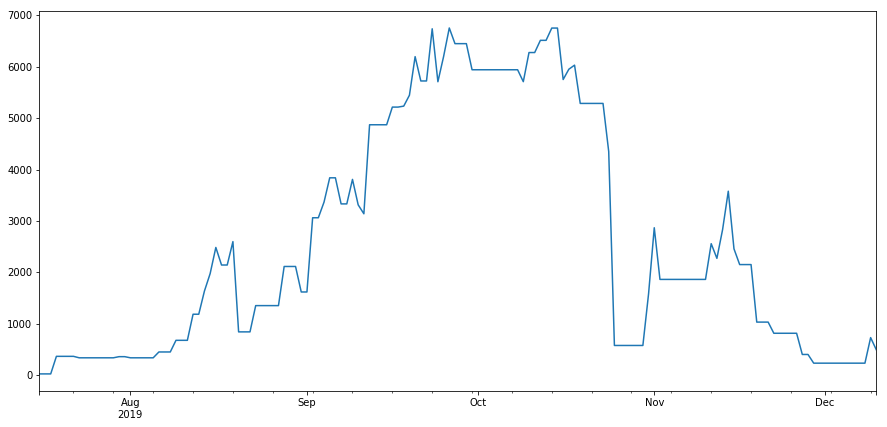

In [99]:
pd.Series(amount_need_dict).plot(figsize=(15, 7))

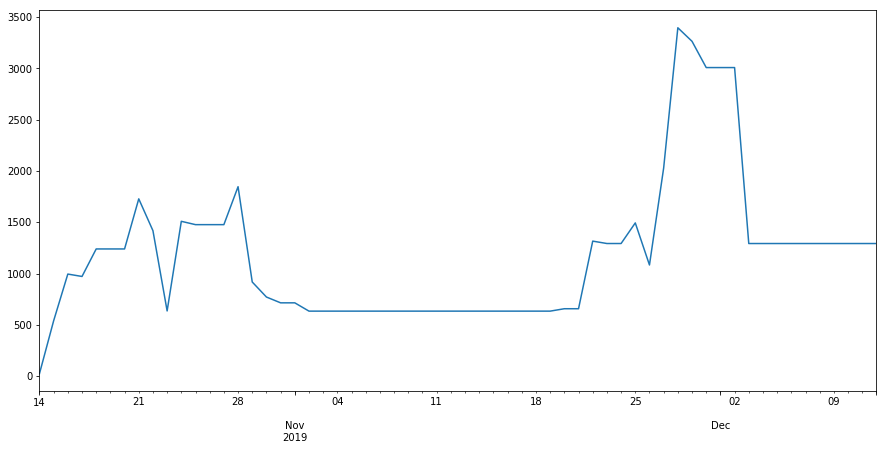

In [88]:
pd.Series(amount_need_dict).plot(figsize=(15, 7))

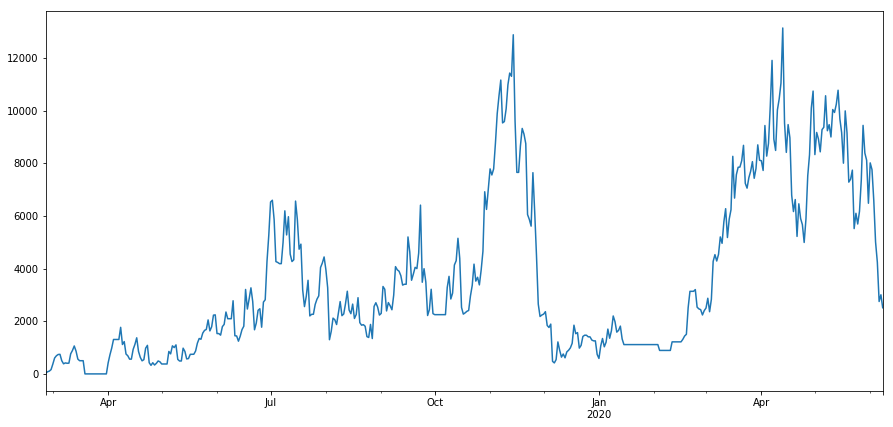

In [77]:
pd.Series(amount_need_dict).plot(figsize=(15, 7))

In [67]:
###以下不是主流程

In [56]:
crit1 = df['下单日期'] <= d
crit2 = df['实提日期'] >= d
df_on = df[crit1 & crit2]

In [61]:
df[crit1 & crit2]['实提吨数'].sum()

2749.861

In [97]:
days_for_loop = pd.date_range(start=pd.to_datetime(df['下单日期'].min()), end=pd.to_datetime(df['实提日期'].max()))
days_for_loop

DatetimeIndex(['2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19',
               '2019-07-20', '2019-07-21', '2019-07-22', '2019-07-23',
               '2019-07-24', '2019-07-25',
               ...
               '2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08',
               '2019-12-09', '2019-12-10'],
              dtype='datetime64[ns]', length=148, freq='D')

In [1]:
# 分析下当前额度情况

In [3]:
df = pd.read_excel('供应商实际额度2020-06-11.xls', sheet_name='华北')

In [6]:
df.head()

,大区,供应商编码,供应商抬头,启用品线,招商,运营,总额度（吨）,联营返利,当日订单重量（吨）,联营利润（元）,未支款（吨）,未提货（吨）,未实提（吨）,剩余可售额度（吨）,可售额度占比
0,华北区,10000202,建发（上海）有限公司,热卷,张克磊/张琦/李明,赵滢,10000,0,0,0,513,313,456,8718,87.18%
1,华北区,10000363,天津津路钢铁实业有限公司,冷镀/热卷/中板,焦晓利,赵滢,1474,3/0/0,0,0,0,0,0,1474,100.00%
2,华北区,10000422,天津启润投资有限公司,冷镀/热卷/建材/中板,焦晓利,赵天,10000,0/0,59,0,149,327,1005,8519,85.19%
3,华北区,10003867,福州诚盛贸易有限公司,建材,杨德国,杨美娟/覃忆莲/赵滢,1600,3,0,0,0,0,0,1600,100.00%
4,华北区,10003938,北京中铁建工物资有限公司,建材,刘桥,周辉/朱学群/赵天/赵滢/郭玉杰/金鑫,20000,0/0,0,0,83,1399,2032,16486,82.43%


In [8]:
df.columns

Index(['大区 ', '供应商编码 ', '供应商抬头 ', '启用品线 ', '招商 ', '运营 ', '总额度（吨） ', '联营返利 ',
       '当日订单重量（吨） ', '联营利润（元） ', '未支款（吨） ', '未提货（吨） ', '未实提（吨） ', '剩余可售额度（吨） ',
       '可售额度占比 '],
      dtype='object')

In [20]:
df['总额度（吨） '].sum()

703387

In [10]:
df['总额度（吨） '].describe()

count      441.000000
mean      1594.981859
std       1800.756134
min        200.000000
25%        500.000000
50%       1000.000000
75%       2000.000000
max      20000.000000
Name: 总额度（吨） , dtype: float64

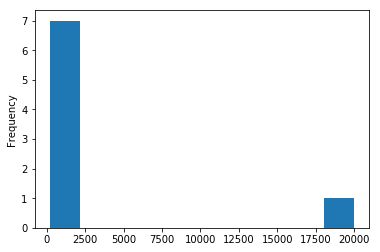

In [11]:
df['总额度（吨） '].describe().plot(kind='hist')

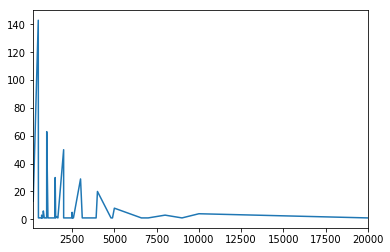

In [17]:
df['总额度（吨） '].value_counts().sort_index().plot()

In [29]:
df[df['总额度（吨） '] >= 5000]

,大区,供应商编码,供应商抬头,启用品线,招商,运营,总额度（吨）,联营返利,当日订单重量（吨）,联营利润（元）,未支款（吨）,未提货（吨）,未实提（吨）,剩余可售额度（吨）,可售额度占比
0,华北区,10000202,建发（上海）有限公司,热卷,张克磊/张琦/李明,赵滢,10000,0,0,0,513,313,456,8718,87.18%
2,华北区,10000422,天津启润投资有限公司,冷镀/热卷/建材/中板,焦晓利,赵天,10000,0/0,59,0,149,327,1005,8519,85.19%
4,华北区,10003938,北京中铁建工物资有限公司,建材,刘桥,周辉/朱学群/赵天/赵滢/郭玉杰/金鑫,20000,0/0,0,0,83,1399,2032,16486,82.43%
7,华北区,10004221,泰安市至伟经贸有限公司,中板,张克磊,孙良艳,5000,0,0,0,0,172,124,4704,94.08%
8,华北区,10004307,苏美达国际技术贸易有限公司,冷镀/热卷/建材/中板,张超,赵滢,5000,2/2/1,0,0,0,591,23,4386,87.72%
46,华北区,I010009280,泊头市海成钢材物资有限公司,热卷,杨德国,赵滢,8000,10,0,0,969,1158,1455,4418,55.23%
83,华北区,I010014294,厦门海翼国际贸易有限公司,热卷,杨德国,赵滢,10000,NaN,0,0,1054,1783,638,6525,65.25%
87,华北区,I010018328,北京住总物流科技有限公司,冷镀/热卷/中板,刘桥,金鑫,5000,0/0,55,0,28,697,1496,2779,55.58%
123,华北区,I010020624,北京鑫航路商贸有限公司,建材,刘桥,金鑫,6598,2,0,0,0,32,464,6102,92.48%
136,华北区,I010021914,天津巨奥钢铁贸易有限公司,建材,杨德国,赵滢,5000,2,0,0,0,66,462,4472,89.44%


In [14]:
df_trading = pd.read_csv('华北大额供应商.csv')

In [15]:
df_trading['下单日期'] = pd.to_datetime(df_trading['下单日期'])
df_trading['实提日期'] = pd.to_datetime(df_trading['实提日期'])

In [42]:
df[df['总额度（吨） '] >= 5000]['供应商抬头 '].values

array(['建发（上海）有限公司', '天津启润投资有限公司', '北京中铁建工物资有限公司', '泰安市至伟经贸有限公司',
       '苏美达国际技术贸易有限公司', '泊头市海成钢材物资有限公司', '厦门海翼国际贸易有限公司', '北京住总物流科技有限公司',
       '北京鑫航路商贸有限公司', '天津巨奥钢铁贸易有限公司', '天津弘大科技有限公司', '汇金工贸（天津）有限公司',
       '汇金钢材加工（天津）有限公司', '北京瑞超兴隆商贸有限公司', '钢棒棒电子商务有限公司',
       '济南市莱芜区高新兴源商贸有限公司', '启润物流（厦门）有限公司', '青岛山海川经贸有限公司', '福建省万展信息科技有限公司'],
      dtype=object)

In [48]:
df[df['总额度（吨） '] >= 5000]['总额度（吨） '].values

array([10000, 10000, 20000,  5000,  5000,  8000, 10000,  5000,  6598,
        5000,  5000,  7000,  8000,  9000,  5000,  8000,  5000,  5000,
       10000], dtype=int64)

In [50]:
dict(zip(df[df['总额度（吨） '] >= 5000]['供应商抬头 '].values, df[df['总额度（吨） '] >= 5000]['总额度（吨） '].values))

{'建发（上海）有限公司': 10000,
 '天津启润投资有限公司': 10000,
 '北京中铁建工物资有限公司': 20000,
 '泰安市至伟经贸有限公司': 5000,
 '苏美达国际技术贸易有限公司': 5000,
 '泊头市海成钢材物资有限公司': 8000,
 '厦门海翼国际贸易有限公司': 10000,
 '北京住总物流科技有限公司': 5000,
 '北京鑫航路商贸有限公司': 6598,
 '天津巨奥钢铁贸易有限公司': 5000,
 '天津弘大科技有限公司': 5000,
 '汇金工贸（天津）有限公司': 7000,
 '汇金钢材加工（天津）有限公司': 8000,
 '北京瑞超兴隆商贸有限公司': 9000,
 '钢棒棒电子商务有限公司': 5000,
 '济南市莱芜区高新兴源商贸有限公司': 8000,
 '启润物流（厦门）有限公司': 5000,
 '青岛山海川经贸有限公司': 5000,
 '福建省万展信息科技有限公司': 10000}

In [16]:
df_trading_one = df_trading[df_trading['供应商名称']=='青岛山海川经贸有限公司']

In [17]:
df_trading_one.head(2)

,供应商名称,下单日期,实提日期,实提吨数
281,青岛山海川经贸有限公司,2020-06-01,2020-06-05,6.058
349,青岛山海川经贸有限公司,2020-05-29,2020-06-01,20.010


In [18]:
days_for_loop = pd.date_range(start=pd.to_datetime(df_trading_one['下单日期'].min()), end=pd.to_datetime(df_trading_one['实提日期'].max()))
days_for_loop

DatetimeIndex(['2019-11-29', '2019-11-30', '2019-12-01', '2019-12-02',
               '2019-12-03', '2019-12-04', '2019-12-05', '2019-12-06',
               '2019-12-07', '2019-12-08',
               ...
               '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
               '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05'],
              dtype='datetime64[ns]', length=190, freq='D')

In [85]:
amount_need_dict = {}
for d in days_for_loop:
    crit1 = df_trading_one['下单日期'] <= d
    crit2 = df_trading_one['实提日期'] >= d
    df_on = df_trading_one[crit1 & crit2]
    if len(df_on) == 0:
        amount_need_dict[d] = 0
    else:
        amount_need_dict[d] = df_on['实提吨数'].sum()

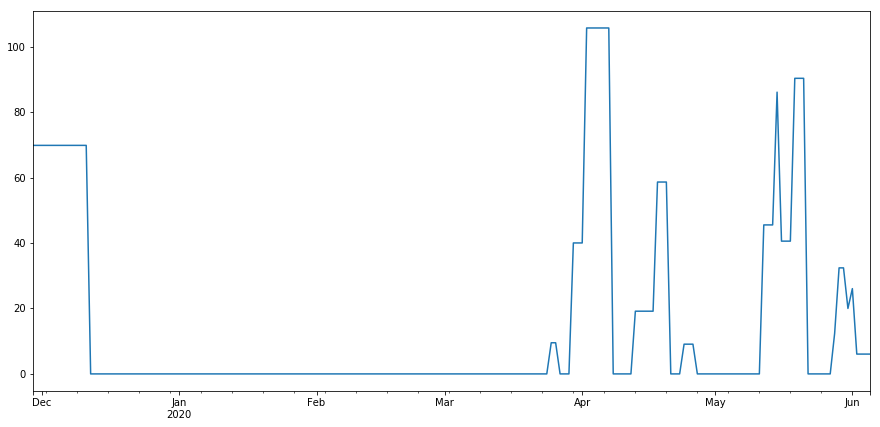

In [87]:
# 青岛山海川经贸有限公司：5000
pd.Series(amount_need_dict).plot(figsize=(15, 7))

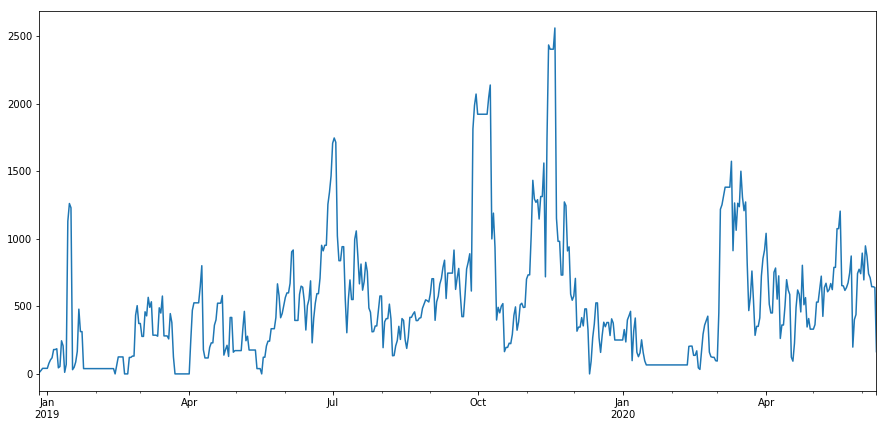

In [70]:
# 天津巨奥钢铁贸易有限公司：5000
pd.Series(amount_need_dict).plot(figsize=(15, 7))

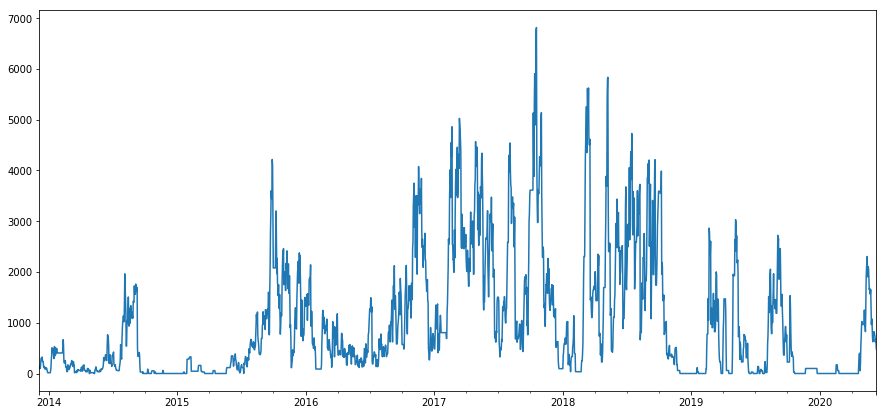

In [47]:
# 建发：10000
pd.Series(amount_need_dict).plot(figsize=(15, 7))